# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [7]:
import math
N = 1000
d = 10 
ads_selected = []
numbers_of_selection = [0] * d 
sums_of_reward = [0] * d 
total_rewards = 0
average_reward = 0

for n in range(0, N) : 
    ad = 0
    max_upper_bound = 0

    for i in range(0, d) : 
        if numbers_of_selection[i] > 0 : 
            average_reward = sums_of_reward[i] / numbers_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selection[i])
            upper_band = average_reward + delta_i
        else : 
            upper_band = 1e400
        if(upper_band > max_upper_bound) : 
            max_upper_bound = upper_band
            ad = i 
        ads_selected.append(ad)
        numbers_of_selection[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_reward[ad]  = sums_of_reward[ad] + average_reward
        total_rewards = total_rewards + reward



## Visualising the results

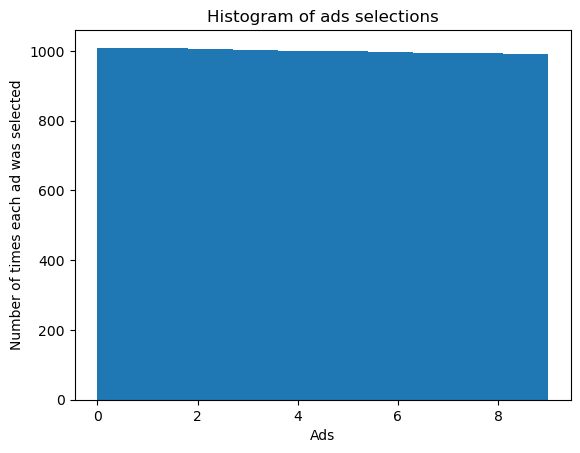

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()